# Análisis exploratorio y predictivo de datos de calidad del Agua
La calidad del agua se define de acuerdo a un conjunto de características químicas, físicas y biológicas. En terminos generales, el cumplimiento de normatividad aplicable en función del tipo de uso o destinación final: consumo humano, uso industrial o doméstico o restauración (medio ambiente/ecosistema, normalmente salud humana/vida acuática), se logra mediante el tratamiento del agua a través de una variedad de procesos físicos, químicos y microbiológicos encaminados a garantizar el equilibrio de los ecosistemas, la seguridad y salubridad del agua posteior a su tratamiento.

## 1. Descripción de la data
La data empleada para este análisis incluye métricas de calidad tales como pH, dureza, conductividad, turbiedad y potabilidad entre otras, de 3728 diferentes cuerpos de agua. Los datos se encuentran alojados en la plataforma kaggle y pueden ser consultados en el siguiente [enlace](https://www.kaggle.com/datasets/adityakadiwal/water-potability).

* Valor de pH:
El pH es un parámetro que evalua el equilibrio ácido-base, por lo tanto es un indicador de la acidez o alcalinidad del agua. Según la OMS el límite máximo permisible de pH es de 6,5 a 8,5. 

* Dureza:
La dureza es causada principalmente por sales de calcio y magnesio. Se definió originalmente como la capacidad del agua para precipitar el jabón causado por el calcio y el magnesio.

* Sólidos (sólidos disueltos totales - TDS):
El agua tiene la capacidad de disolver una amplia gama de minerales o sales orgánicas e inorgánicas, tales como potasio, calcio, sodio, bicarbonatos, cloruros, magnesio, sulfatos, etc. Estos minerales producen un sabor no deseado y un color diluido en la apariencia del agua. El límite deseable para TDS en agua potable es 500 mg/l y el límite máximo es 1000 mg/l.

* Cloraminas:
El cloro y la cloramina son los principales desinfectantes utilizados en los sistemas públicos de agua. Las cloraminas se forman más comúnmente cuando se agrega amoníaco al cloro para tratar el agua potable. Los niveles de cloro de hasta 4 miligramos por litro (mg/L o 4 partes por millón (ppm)) se consideran seguros en el agua potable.

* Sulfato:
Los sulfatos son sustancias naturales que se encuentran en minerales, suelo y rocas. La concentración de sulfato en el agua de mar es de unos 2.700 miligramos por litro (mg/L). Varía de 3 a 30 mg/L en la mayoría de los suministros de agua dulce, aunque se encuentran concentraciones mucho más altas (1000 mg/L) en algunas ubicaciones geográficas.

* Conductividad:
El agua pura no es un buen conductor de corriente eléctrica, sino un buen aislante. El aumento de la concentración de iones mejora la conductividad eléctrica del agua. En general, la cantidad de sólidos disueltos en el agua determina la conductividad eléctrica. La conductividad eléctrica (CE) mide en realidad el proceso iónico de una solución que le permite transmitir corriente. Según los estándares de la OMS, el valor de CE no debe superar los 400 μS/cm.

* Carbono orgánico:
El carbono orgánico total (TOC) en las aguas de origen proviene de la materia orgánica natural (MNO) en descomposición, así como de fuentes sintéticas. El TOC es una medida de la cantidad total de carbono en los compuestos orgánicos del agua pura. Según la EPA de EE. UU., < 2 mg/L es la concentración máxima permisible de TOC en agua tratada/potable.

* Trihalometanos:
Los THM son sustancias químicas que pueden encontrarse en el agua tratada con cloro. La concentración de THM en el agua potable varía según el nivel de material orgánico en el agua, la cantidad de cloro necesaria para tratar el agua y la temperatura del agua que se está tratando. Se consideran seguros niveles de THM de hasta 80 ppm en el agua potable.

* Turbidez:
La turbidez del agua depende de la cantidad de materia sólida presente en estado suspendido. Es una medida de las propiedades de emisión de luz del agua y la prueba se utiliza para indicar la calidad de la descarga de desechos con respecto a la materia coloidal. El valor medio de turbidez recomendado por la OMS es de 5,00 NTU.

* Potabilidad:
Indica si el agua es segura para el consumo humano, donde 1 significa Potable y 0 significa No potable.

## 2.  Aspectos básicos
### 2.1 Importar librerias y cargar datos

In [11]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)

In [12]:
#Conjunto de datos
df = pd.read_csv('/kaggle/input/water-potability/Watera.csv')

### 2.2  Estructura de los datos 

In [13]:
#Número de filas y columnas en el conjunto de datos
df.shape

#Variables en el conjunto de datos
df.columns

#Tipo de datos
df.dtypes

# Número de registros duplicados 
df.duplicated().sum()

#Total de datos nulos por variable
df.isnull().sum()

ph                 3121
hardness              0
tds                2384
chlorine              0
sulfate             813
conductivity       1598
organic_carbon        0
trihalomethanes       0
turbidity             0
potability            0
dtype: int64

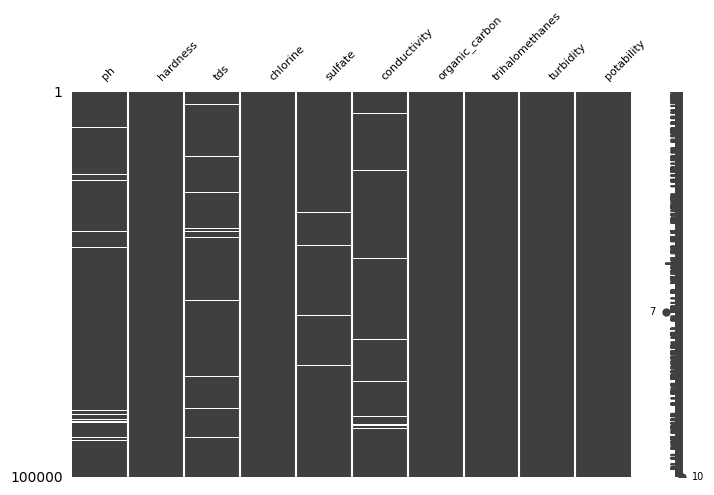

In [14]:
#Distribución de valores nulos en el conjunto de datos
msno.matrix(df, figsize=(8,5), fontsize=8)
plt.show()

- El conjunto de datos contiene registros de 100000 diferentes cuerpos de agua e incluye valores de nueve  (9) de sus propiedades entre ellas el pH, la conductividad, la dureza, sólidos disueltos y sulfatos entre otros. Estas propiedades corresponden a las variables independientes que describen la potabilidad del agua (1) o no (0), descrita como una variable categócrica, en el reporte de calidad cuerpo de agua.
- No cuenta con registros duplicados. 
- Presenta valores ausentes o nulos distribuidos de forma aleatoria en cuatro (4) propiedades: pH, tds, conductividad,que corresponden a menos de 4% del total de registros.

Como tratamiento inicial de los datos, se imputó el valor medio de cada variable en los campos nulos: 

In [15]:
#Imputación de valores en campos nulos
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['tds'] = df['tds'].fillna(df['tds'].mean())
df['sulfate'] = df['sulfate'].fillna(df['sulfate'].mean())
df['conductivity'] = df['conductivity'].fillna(df['conductivity'].mean())

## 3. Análisis exploratorio de los datos
El resumen estadístico de los datos presenta las métricas básicas del conjunto de datos: conteo de registros, valor medio, desviación estandar, valor mínimo, máximo, primer, segundo y tercer cuartil de cada variable. En general, se puede apreciar que en su orden, la conductividad, sólidos disueltos, dureza, concentración de sulfatos y trihalometanos, devido a su naturaleza, presentan los valores más elevados en todas las métricas, por ende pueden ejercen mayor influencia en la creación de modelos predictivos en comparación con las otras variables.

In [16]:
#Resumen estadístico por variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,100000.0,7.249512,0.979958,5.00,6.5200,7.249512,7.9500,9.99
hardness,100000.0,309.214750,222.321384,0.00,151.5400,271.080000,391.5800,1099.99
tds,100000.0,330.220307,243.085573,0.03,163.1975,275.265000,375.8200,1099.99
chlorine,100000.0,2.500058,1.616047,0.00,1.2300,2.410000,3.5700,8.99
sulfate,100000.0,252.959861,152.332870,0.00,138.7300,238.680000,335.7125,799.97
conductivity,100000.0,2008.131292,3996.332633,0.04,726.2350,1463.315000,2151.0950,39961.99
organic_carbon,100000.0,7.198689,3.507656,0.00,4.7100,7.300000,9.8400,17.99
trihalomethanes,100000.0,72.739011,50.389586,0.00,29.9975,68.010000,105.7000,229.96
turbidity,100000.0,3.139499,2.417457,0.00,1.4500,2.660000,4.3000,13.99
potability,100000.0,0.076160,0.265255,0.00,0.0000,0.000000,0.0000,1.00


El análisis de la relación entre variables, sentido y fuerza, permite establecer que no existe correlación entre variables y la influencia de estas sobre la potabilidad del agua es muy debil y de sentido negativo.

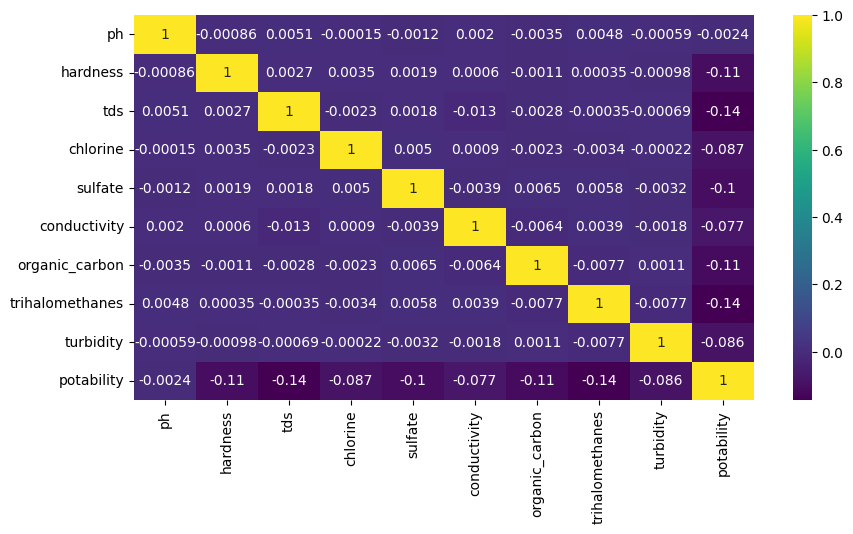

In [17]:
# Correlación entre variables
correlation = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation,cmap='viridis', annot=True)
plt.show()

A partir de la distribución de los registros en el conjunto de datos, se establece que la data se encuentra desbalanceada y la clase dominante corresponde al reporte de calidad de agua como recurso no potable. Tan solo el 7.6% de los cuerpos de agua en estudio son de agua potable.

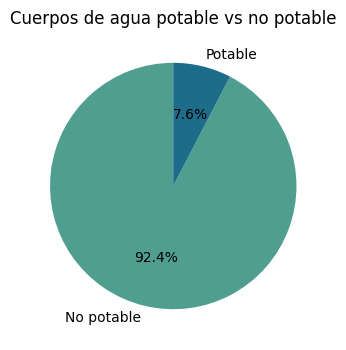

In [28]:
#Distribución de registros,  cuerpos de agua potable ('1') vs no potable ('0')
potability = df['potability'].value_counts(normalize = True)
plt.figure(figsize = (4,4))
plt.pie(potability, labels = ['No potable', 'Potable'], autopct = '%1.1f%%', startangle =90, colors=sns.color_palette("crest", 2))
plt.title('Cuerpos de agua potable vs no potable')
plt.show()

La compartativa entre la distribución de las variables para cuerpos de agua potable o no, permite establecer que, si bien se aprecia una comportamiento similar en todos los casos, es decir la forma de las distrubiciones es aparentemente la misma, la dispersión de las variables difiere. En general, a exepción del pH, para cuerpos de agua no potable las variables tendienden a concentraciónes más elevadas. Para cuerpos de agua potables, las variables se encuentran centradas en torno a los límites permisibles mencionados en la descripción de los datos.

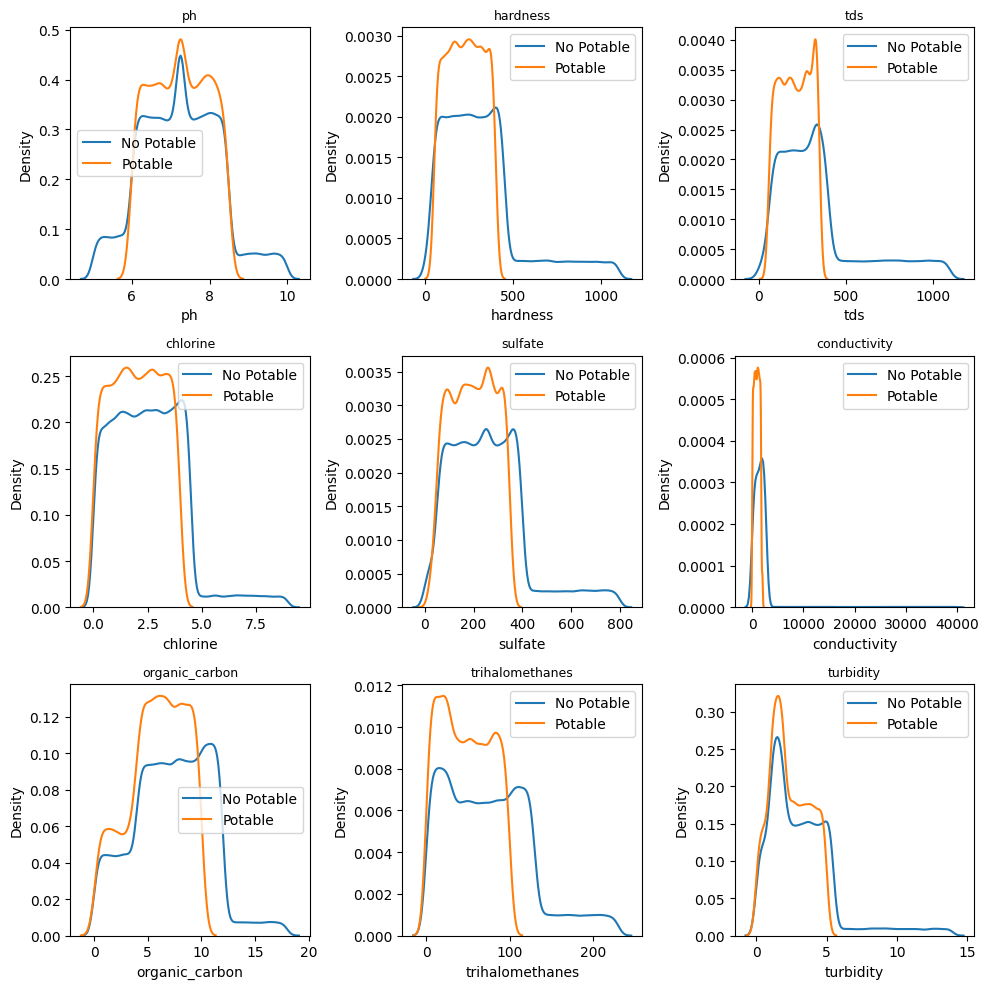

In [19]:
# Distribución de variables según calidad del agua
no_potable = df.query("potability == 0")
potable = df.query("potability == 1")

plt.figure(figsize = (10,10))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax +1)
    plt.title(col, fontsize=9)
    sns.kdeplot(x = no_potable[col], label = "No Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

## 4. Creación y evaluación de modelos para predicción de la calidad del agua

Para la predicción de la potabilidad del agua de acuerdo al reporte de calidad, se emplearan los modelos de machine learning: DesicionTreeClassifier, KNeighborsClassifier, LogisticRegression y SVC. Una vez entrenados los modelos, se evaluara el rendimiento de los mismos mediante las métricas: precision, recall y F1-score.

In [20]:
# escaldo de características
X = df.drop('potability', axis = 1)
y = df.potability
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[X.columns] = scaler.fit_transform(X)

In [21]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 1)
print(X_train.shape, X_test.shape)

(80000, 9) (20000, 9)


In [22]:
# Entrenamieto y evaluación de los modelos de machine learning
models = [DecisionTreeClassifier(class_weight ='balanced'), KNeighborsClassifier(), LogisticRegression(max_iter=1000, 
          class_weight ='balanced'), SVC(class_weight ='balanced')]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'modelo : {str(model)}')
    print(classification_report(y_test,y_pred, zero_division = 1))

modelo : DecisionTreeClassifier(class_weight='balanced')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18446
           1       0.98      0.98      0.98      1554

    accuracy                           1.00     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       1.00      1.00      1.00     20000

modelo : KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     18446
           1       0.61      0.51      0.55      1554

    accuracy                           0.94     20000
   macro avg       0.78      0.74      0.76     20000
weighted avg       0.93      0.94      0.93     20000

modelo : LogisticRegression(class_weight='balanced', max_iter=1000)
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     18446
           1       0.24      0.83      0.37      1554

    accuracy             

In [23]:
Tree = DecisionTreeClassifier(class_weight ='balanced')
Tree.fit(X_train, y_train)
y_pred_prob = Tree.predict_proba(X_test)

A partir los resultados del reporte de clasificación generado para cada modelo, se establece que el árbol de desición presenta el mejor rendimiento para predecir la potabilidad del recurso en los cuerpos de agua. Tanto la precisión (proporción de casos predichos como positivos que son realmente positivos), como el recall (proporción de casos positivos reales correctamente identificados), son altos, con un valor de 1 para la clase negativa (no potable) y 0.98 para la clase positiva (potable). Esto indica un buen rendimiento general del modelo,incluso en un conjunto desbalanceado, donde la clase negativa o no potable predomina en el conjunto de datos. El modelo es capaz de predecir tanto los cuerpos de agua catalogados como potables como los no potables.

### Importancia de características
De acuerdo  al análisis de la importancia de características, las variables más relevantes y que proporcionan una mejor división del conjunto de datos (menor impureza según indice de Gini) en cuanto a la clasificación de los cuerpos de agua como aptos para consumo o no, son la conductividad, los sólidos disueltos, trietalometanos y la dureza.

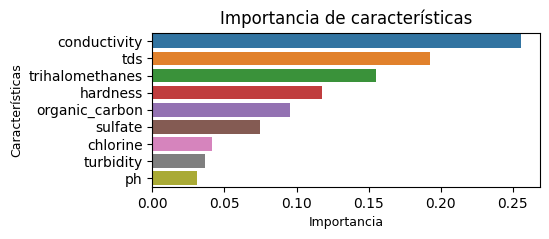

In [25]:
#Importancia de las características
importances = Tree.feature_importances_
importances_df = pd.DataFrame({'Variable': X.columns, 'Importancia' : importances})
importances_df = importances_df.sort_values(by='Importancia',ascending = False)

#Gráfico importancia de características
plt.figure(figsize=(5, 2))
sns.barplot(data=importances_df, x='Importancia', y='Variable')
plt.title('Importancia de características', fontsize=12)
plt.xlabel('Importancia', fontsize=9)
plt.ylabel('Características', fontsize=9)
plt.show()

### Análisis Adicional de la Precisión y Recall con Umbrales
Para evaluar el rendimiento del modelo en diferentes umbrales de clasificación, crucial en datos desbalanceados, se calcularon la curva de precisión-recall y el average precision score (AP score).

- Curva de Precisión-Recall: La curva muestra cómo varía la precisión y el recall a medida que se ajusta el umbral de decisión, lo cual es útil para determinar el mejor umbral que balancee las clases, especialmente cuando la clase negativa (no potable) predomina en el conjunto de datos.

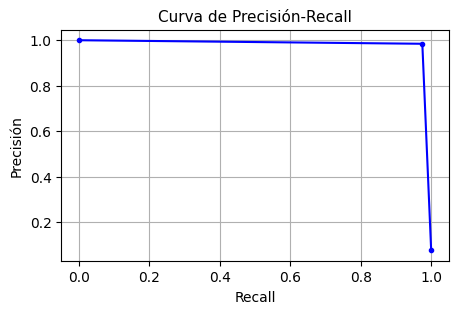

In [26]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_prob[:,1])
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, marker='.', color='b', label='Modelo')
plt.xlabel('Recall', fontsize=10)
plt.ylabel('Precisión', fontsize=10)
plt.title('Curva de Precisión-Recall', fontsize=11)
plt.grid(True)
plt.show()

La curva muestra que el modelo tiene un buen rendimiento incluso en umbrales más estrictos, lo que indica que puede identificar con alta precisión los cuerpos de agua potables sin una alta tasa de falsos positivos.

- Puntuación de Precisión Promedio (AP Score): La puntuación de precisión promedio calculada fue 0.963, lo que indica un buen rendimiento general del modelo al considerar todos los umbrales posibles. Este valor refleja la capacidad del modelo para identificar correctamente los cuerpos de agua potables, a pesar del desbalance de clases.

La alta puntuación de precisión promedio valida que el modelo utiliza adecuadamente las características más importantes (como la conductividad y los sólidos disueltos) para hacer predicciones precisas, incluso ante el desbalance.

In [ ]:
ap_score = average_precision_score(y_test, y_pred_prob[:,1])
ap_score